# Recherche des catalogues

In [1]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pyarrow

In [3]:
# Verify SparkContext
print(sc)

# Print Spark version
print(sc.version)

<SparkContext master=mesos://vm-75063.lal.in2p3.fr:5050 appName=PySparkShell>
2.4.4


In [4]:
from pyspark.sql.functions import col, pandas_udf 
from pyspark.sql.types import LongType

from pyspark.sql.types import IntegerType,FloatType
from pyspark.sql.functions import pandas_udf, PandasUDFType

from pyspark.sql import functions as F
from pyspark.sql.functions import randn

In [5]:
# here is how we create a function ('Ang2Pix') that can be called by dataframes
# it takes as input the "ra" and "dec" values (which are not very different from theta/phi)
# and returns the pixel number (but as pandas series for efficiency)
import numpy as np
import pandas as pd
import healpy as hp

nside=512

In [6]:
! hadoop dfs -ls /lsst/DC2/cosmoDC2

DEPRECATED: Use of this script to execute hdfs command is deprecated.
Instead use the hdfs command for it.

Found 5 items
drwxr-xr-x   - stephane.plaszczynski lsst          0 2019-09-03 20:04 /lsst/DC2/cosmoDC2/cosmoDC2_v1.1.4_image.parquet
drwxr-xr-x   - stephane.plaszczynski lsst          0 2019-10-16 10:52 /lsst/DC2/cosmoDC2/cosmoDC2_v1.1.4_image_double.parquet
drwxr-xr-x   - stephane.plaszczynski lsst          0 2020-04-23 17:28 /lsst/DC2/cosmoDC2/cosmoDC2_v1.1.4_image_nofaint.parquet
drwxr-xr-x   - stephane.plaszczynski lsst          0 2020-09-07 19:17 /lsst/DC2/cosmoDC2/shear_cosmoDC2
drwxr-xr-x   - stephane.plaszczynski lsst          0 2019-04-16 18:40 /lsst/DC2/cosmoDC2/xyz_v1.1.4_hive


In [7]:
! hadoop dfs -ls /lsst/DC2/cosmoDC2/shear_cosmoDC2/10066/

DEPRECATED: Use of this script to execute hdfs command is deprecated.
Instead use the hdfs command for it.

-rw-r--r--   3 stephane.plaszczynski lsst  240603132 2020-09-07 19:14 /lsst/DC2/cosmoDC2/shear_cosmoDC2/10066


In [8]:
base_dir="/lsst/DC2/cosmoDC2/shear_cosmoDC2"

In [9]:
fullfilename="/lsst/DC2/cosmoDC2/cosmoDC2_v1.1.4_image.parquet"
datafile=fullfilename
FLAG_ONE_FILE_INPUT=True

In [10]:
#from subprocess import Popen, PIPE
#hdfs_path = base_dir
#process = Popen(f'hdfs dfs -ls -h {hdfs_path}', shell=True, stdout=PIPE, stderr=PIPE)
#std_out, std_err = process.communicate()
#list_of_file_names = [fn.split(' ')[-1].split('/')[-1] for fn in std_out.decode().readlines()[1:]][:-1]
#list_of_file_names_with_full_address = [fn.split(' ')[-1] for fn in std_out.decode().readlines()[1:]][:-1]

In [11]:
#for fn in std_out.readlines():
#    print(fn)

In [12]:
from pyspark.sql import SparkSession

# Initialise our Spark session
spark = SparkSession.builder.getOrCreate()

In [13]:
# Read the data as DataFrame
if FLAG_ONE_FILE_INPUT:
    df = spark.read.format("parquet").load(datafile)
else: # read all files
    #the_list_of_files=os.listdir(base_dir)
    #the_sorted_list_of_files=sorted(the_list_of_files)
    #print("sorted files : ",the_sorted_list_of_files[:5])
    #selected_files=[]
    #for filename in the_sorted_list_of_files:
    #    sel_filename=re.findall("^dc2_object_run2.2i_dr6c_tract[0-9][0-9][0-9][0-9].parquet$",filename)
    #    if len(sel_filename) > 0:
    #        selected_files.append(sel_filename[0])
    #print("selected files : ", selected_files[:5])
    #InputPath = [base_dir + "/{}".format(filename) for filename in selected_files]
    InputPath = all_files  # filename from the decoded index file
    df = spark.read.parquet(*InputPath)        

In [14]:
df.printSchema()

root
 |-- Mag_true_g_lsst_z0: float (nullable = true)
 |-- Mag_true_z_lsst_z0: float (nullable = true)
 |-- ra: float (nullable = true)
 |-- mag_y: float (nullable = true)
 |-- mag_z: float (nullable = true)
 |-- size_true: float (nullable = true)
 |-- halo_id: long (nullable = true)
 |-- position_x: float (nullable = true)
 |-- mag_g: float (nullable = true)
 |-- Mag_true_u_lsst_z0: float (nullable = true)
 |-- mag_true_r: float (nullable = true)
 |-- position_angle_true: float (nullable = true)
 |-- mag_true_g: float (nullable = true)
 |-- stellar_mass: float (nullable = true)
 |-- Mag_true_y_lsst_z0: float (nullable = true)
 |-- position_y: float (nullable = true)
 |-- mag_true_i: float (nullable = true)
 |-- redshift: float (nullable = true)
 |-- Mag_true_i_lsst_z0: float (nullable = true)
 |-- mag_r: float (nullable = true)
 |-- mag_true_y: float (nullable = true)
 |-- dec: float (nullable = true)
 |-- mag_true_u: float (nullable = true)
 |-- Mag_true_r_lsst_z0: float (nullable = 

In [15]:
rs=df.select("redshift")

In [16]:
rs.show()

+------------+
|    redshift|
+------------+
|  0.02164939|
|  0.02191215|
| 0.021491187|
| 0.021335145|
| 0.006085375|
|0.0062329015|
| 0.022323765|
| 0.013605996|
| 0.020426989|
| 0.011232678|
| 0.007916852|
| 0.018281268|
| 0.015733609|
| 0.021410722|
| 0.021449156|
|  0.02179927|
| 0.020016473|
| 0.017602554|
| 0.019653492|
| 0.021616712|
+------------+
only showing top 20 rows



In [17]:
df.count()

2256249331

In [18]:
rs.describe().show()

+-------+------------------+
|summary|          redshift|
+-------+------------------+
|  count|        2256249331|
|   mean| 1.871054622648074|
| stddev|0.7098291050264711|
|    min|       4.017382E-4|
|    max|         3.1891842|
+-------+------------------+



In [19]:
#compute only min and max of "z" (see F.min and select in DOC)
q=rs["redshift"]
rs.agg(F.min(q),F.max(q)).collect()


[Row(min(redshift)=0.00040173818706534803, max(redshift)=3.1891841888427734)]

In [21]:
minmax = rs.agg(F.min("redshift"), F.max("redshift")).head()

In [22]:
minmax

Row(min(redshift)=0.00040173818706534803, max(redshift)=3.1891841888427734)

# Histogram

In [23]:
#histogram caracteristics
#get the minmax values in an array: you already saw how to get the output in a dataframe.
# then you can put these values in memory with the "first()" function
minmax=rs.agg(F.min("redshift"), F.max("redshift")).head()
zmin=minmax[0]
zmax=minmax[1]
Nbins=100
dz=(zmax-zmin)/Nbins
print(zmin,zmax,dz)

0.00040173818706534803 3.1891841888427734 0.03188782450655708


In [24]:
bin=rs["redshift"]-zmin

In [26]:
rs=rs.withColumn("bin", ((rs["redshift"]-zmin)/dz).astype('int'))
rs.show(20)


+------------+---+
|    redshift|bin|
+------------+---+
|  0.02164939|  0|
|  0.02191215|  0|
| 0.021491187|  0|
| 0.021335145|  0|
| 0.006085375|  0|
|0.0062329015|  0|
| 0.022323765|  0|
| 0.013605996|  0|
| 0.020426989|  0|
| 0.011232678|  0|
| 0.007916852|  0|
| 0.018281268|  0|
| 0.015733609|  0|
| 0.021410722|  0|
| 0.021449156|  0|
|  0.02179927|  0|
| 0.020016473|  0|
| 0.017602554|  0|
| 0.019653492|  0|
| 0.021616712|  0|
+------------+---+
only showing top 20 rows



In [27]:
rs.describe(['redshift','bin']).show()

+-------+------------------+-----------------+
|summary|          redshift|              bin|
+-------+------------------+-----------------+
|  count|        2256249331|       2256249331|
|   mean|1.8710546226480747|58.16348301224161|
| stddev|0.7098291050264711|22.26201909111259|
|    min|       4.017382E-4|                0|
|    max|         3.1891842|              100|
+-------+------------------+-----------------+



In [28]:
# create the h dataframe using groupBy and count
h=rs.groupBy("bin").count()
# look at some values
h.show(10)

+---+--------+
|bin|   count|
+---+--------+
| 31|22242720|
| 85|31862453|
| 65|32544087|
| 53|31083589|
| 78|32375377|
| 34|24111062|
| 81|32098317|
| 28|20255635|
| 76|32400298|
| 26|18797921|
+---+--------+
only showing top 10 rows



In [29]:
#sort h (see sort or orderBy in DOC)
h=h.sort("bin")
#always check some values
h.show(5)

+---+-------+
|bin|  count|
+---+-------+
|  0|  19825|
|  1| 147618|
|  2| 360349|
|  3| 686392|
|  4|1047065|
+---+-------+
only showing top 5 rows



In [30]:
# add to h a column (named "loc") giving the center of the bin
h=h.withColumn("loc", zmin+dz*h["bin"]+dz/2)
h.show(5)

+---+-------+-------------------+
|bin|  count|                loc|
+---+-------+-------------------+
|  0|  19825|0.01634565044034389|
|  1| 147618|0.04823347494690097|
|  2| 360349|0.08012129945345806|
|  3| 686392|0.11200912396001514|
|  4|1047065|0.14389694846657222|
+---+-------+-------------------+
only showing top 5 rows



In [31]:
# convert h to a pandas object (see toPandas in DOC)
# you may drop the "bin" column first (see drop in DOC)
p=h.toPandas()
print(p.columns,"size={}".format(p.index.size))

Index(['bin', 'count', 'loc'], dtype='object') size=101


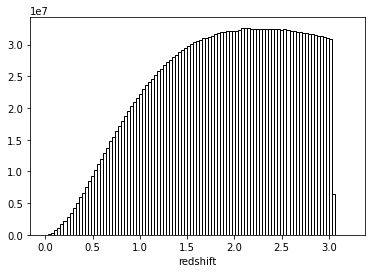

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(p['loc'].values,p['count'].values,dz,color='white',edgecolor='black')
plt.xlabel("redshift");